# Graph converter and resources estimator

In this notebook, we show how to convert Qiskit circuits to graph representations and estimate the photonic resources required for implementing quantum circuits on photonic hardware.

As usual, we start by importing the needed libraries. Note that this notebook requires the installation of Qiskit (which can be easily done with `pip install qiskit`).

In [1]:
from qiskit.circuit.random import random_circuit
from perceval import pdisplay, Format
from perceval_interop import CircuitToGraphConverter
from perceval_interop.qiskit import ResourcesEstimator

We create a random Qiskit circuit.

In [2]:
qiskit_circuit = random_circuit(8, 10, max_operands=2)

Then we convert it to a graph.

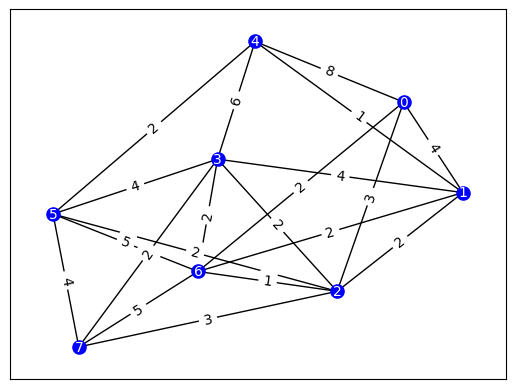

In [3]:
converter = CircuitToGraphConverter(qiskit_circuit=qiskit_circuit)
graph = converter.generate_graph()
pdisplay(graph, output_format=Format.MPLOT)

We can also estimate the resources needed to convert the Qiskit circuit into a photonic circuit.

In [4]:
estimator = ResourcesEstimator(qiskit_circuit)

print('Encoding:', estimator.encoding)
print('Number of modes needed:', estimator.num_modes_needed)
print('Number of photons needed:', estimator.num_photons_needed)

custom_encoding = [[0, 1], [2, 3], [4, 5], [6, 7]]  # Force a given encoding
est2 = ResourcesEstimator(qiskit_circuit, custom_encoding)

print('Encoding:', est2.encoding)
print('Number of modes needed:', est2.num_modes_needed)
print('Number of photons needed:', est2.num_photons_needed)

Encoding: [[0], [1], [2], [3], [4], [5], [6], [7]]
Number of modes needed: 16
Number of photons needed: 120
Encoding: [[0, 1], [2, 3], [4, 5], [6, 7]]
Number of modes needed: 16
Number of photons needed: 348
